In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [4]:
training_data = pd.read_csv(r"C:\Users\alfem\Desktop\DATA603\TrainingData.csv")
testing_data = pd.read_csv(r"C:\Users\alfem\Desktop\DATA603\TestingData.csv")

In [12]:
training_data

,Age,Annual Income,Credit Score,Experience,Loan Amount,Loan Duration,Number of Dependents,Monthly Debt Payment,Creditcard Utilizatio Rate,Number of Open Credit Lines,...,Total Assets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,45,39948,617,22,13152,48,2,183,0.354418,1,...,146111,19183,3329.000000,0.724972,11,126928,0.227590,419.805992,0.181077,0
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,53204,9595,3309.083333,0.935132,3,43609,0.201077,794.054238,0.389852,0
2,47,40724,570,26,17627,36,2,902,0.137414,2,...,25176,128874,3393.666667,0.872241,6,5205,0.212548,666.406688,0.462157,0
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,104822,5370,5757.000000,0.896155,5,99452,0.300911,1047.506980,0.313098,0
4,58,51250,564,39,12741,48,0,337,0.367380,6,...,65624,43894,4270.833333,0.884275,5,21730,0.205271,391.300352,0.170529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,49,123449,566,24,24690,36,0,206,0.464502,2,...,96544,43066,10287.416670,0.919989,6,53478,0.246471,977.067097,0.115001,1
896,26,110829,601,8,15915,72,0,201,0.301985,0,...,128846,27438,9235.750000,0.952037,3,101408,0.200742,381.893786,0.063113,1
897,37,111442,575,15,31138,48,5,243,0.264508,4,...,70241,9516,9286.833333,0.599649,3,60725,0.258234,1046.798068,0.138885,1
898,49,31916,574,26,9659,60,1,311,0.332784,4,...,38535,95260,2659.666667,0.947645,7,9998,0.188166,249.585839,0.210773,1


In [13]:
testing_data

,Age,Annual Income,Credit Score,Experience,Loan Amount,Loan Duration,Number of Dependents,Monthly Debt Payment,Creditcard Utilizatio Rate,Number of Open Credit Lines,...,Total Assets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,53,42478,552,33,10463,72,2,597,0.383507,5,...,27296,30757,3539.833333,0.972212,7,5996,0.221873,264.059369,0.243249,0
1,54,25911,571,28,10751,60,4,544,0.321581,2,...,15047,65767,2159.250000,0.841848,5,5576,0.244892,312.344769,0.396594,0
2,18,27112,432,0,32743,72,0,821,0.531712,1,...,48699,8253,2259.333333,0.794940,4,40446,0.378836,1157.134465,0.875539,0
3,35,54015,612,14,13313,60,3,298,0.196421,1,...,80818,3399,4501.250000,0.754604,4,77419,0.202899,354.864257,0.145041,0
4,35,32033,585,10,24194,12,2,302,0.448020,4,...,127782,80487,2669.416667,0.910957,5,47295,0.225888,2271.284384,0.963988,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,20,46336,573,0,20886,36,2,640,0.417823,5,...,329306,21047,3861.333333,0.852374,1,308259,0.198840,774.965157,0.366445,1
396,38,50143,584,14,10725,60,4,277,0.247056,3,...,176272,12812,4178.583333,0.854873,6,163460,0.250617,315.181096,0.141718,1
397,41,127332,507,19,15848,84,5,539,0.572216,2,...,121731,10322,10611.000000,0.893236,2,111409,0.252989,404.172846,0.088886,1
398,68,151084,620,47,29957,36,0,1311,0.331503,1,...,18065,33704,12590.333330,0.848402,6,1874,0.182904,1087.386706,0.190494,1


In [5]:
X = training_data.iloc[:, :-1].values  # All columns except the last
y = training_data.iloc[:, -1].values   # The last column (label)

# Compute mean vectors for each class
mean_approved = np.mean(X[y == 0], axis=0)
mean_denied = np.mean(X[y == 1], axis=0)

In [6]:
# Within-class scatter matrix (S_W)
S_W = np.zeros((X.shape[1], X.shape[1]))
for label in [0, 1]:  # 0: Approved, 1: Denied
    class_scatter = np.cov(X[y == label], rowvar=False) * (len(X[y == label]) - 1)
    S_W += class_scatter


# Between-class scatter matrix (S_B)
mean_overall = np.mean(X, axis=0)
S_B = np.outer(mean_approved - mean_overall, mean_approved - mean_overall) * len(X[y == 0])
S_B += np.outer(mean_denied - mean_overall, mean_denied - mean_overall) * len(X[y == 1])
# Solve the eigenvalue problem for S_W^-1 * S_B
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
w = eigenvectors[:, sorted_indices[0]]  # The eigenvector with the largest eigenvalue

# Project the training data onto w
training_projection = X.dot(w)

X_test = testing_data.iloc[:, :-1].values
testing_projection = X_test.dot(w)

# Calculate mean projections
mean_projection_approved = np.mean(training_projection[y == 0])
mean_projection_denied = np.mean(training_projection[y == 1])
threshold = (mean_projection_approved + mean_projection_denied) / 2

# Classify the testing samples
predictions = (testing_projection > threshold).astype(int)

y_test = testing_data.iloc[:, -1].values

# Calculate errors
type1_error = np.sum((predictions == 1) & (y_test == 0)) / len(y_test[y_test == 0])  # Approved -> Denied
type2_error = np.sum((predictions == 0) & (y_test == 1)) / len(y_test[y_test == 1])  # Denied -> Approved

print(f"Type 1 Error Rate: {type1_error}")
print(f"Type 2 Error Rate: {type2_error}")

Type 1 Error Rate: 0.16
Type 2 Error Rate: 0.03


In [7]:
# Separate features and target
X_train = training_data.iloc[:, :-1]  # All columns except the last one (features)
y_train = training_data.iloc[:, -1]   # Last column (target variable)
X_test = testing_data.iloc[:, :-1]
y_test = testing_data.iloc[:, -1]

dec_tree = DecisionTreeClassifier(criterion="gini", max_depth=None, random_state=42)
dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.835

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       200
           1       0.83      0.84      0.84       200

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400


Confusion Matrix:
 [[165  35]
 [ 31 169]]


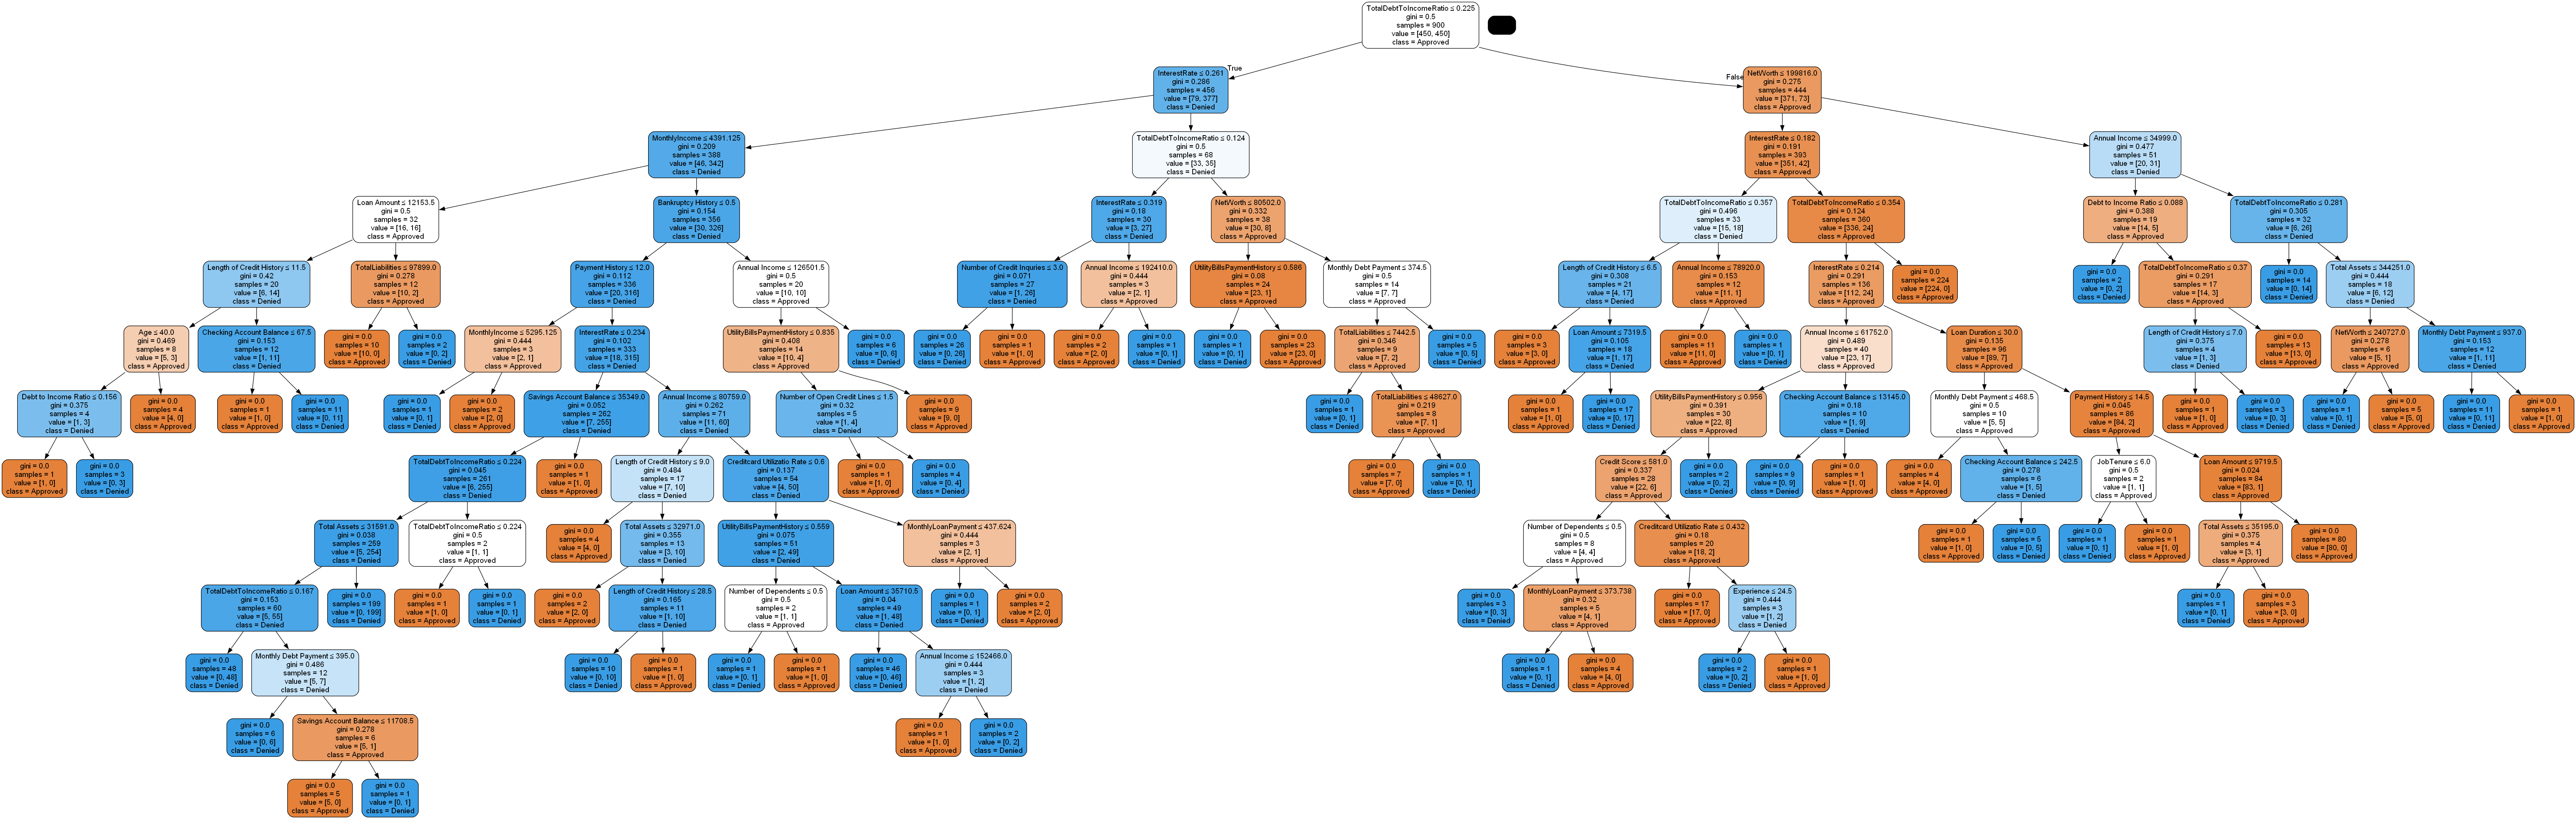

In [8]:
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Export as dot file
dot_data = export_graphviz(
    dec_tree,
    out_file=None,
    feature_names=X_train.columns,
    class_names=["Approved", "Denied"],  # Update these labels if necessary
    filled=True,
    rounded=True,
    special_characters=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [9]:
# Initialize KNN with k=1
knn = KNeighborsClassifier(n_neighbors=1)

# Train the KNN classifier
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7825

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       200
           1       0.77      0.81      0.79       200

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400


Confusion Matrix:
 [[150  50]
 [ 37 163]]


In [10]:
# Initialize KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8225

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       200
           1       0.82      0.83      0.82       200

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400


Confusion Matrix:
 [[163  37]
 [ 34 166]]


In [11]:
# Initialize KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8325

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       200
           1       0.81      0.86      0.84       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400


Confusion Matrix:
 [[160  40]
 [ 27 173]]


In [12]:
# Initialize KNN with k=10
knn = KNeighborsClassifier(n_neighbors=10)

# Train the KNN classifier
knn.fit(X_train, y_train)
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8325

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       200
           1       0.83      0.83      0.83       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400


Confusion Matrix:
 [[166  34]
 [ 33 167]]


My KNN model

In [13]:
from collections import Counter


def euclidean_distance(X, Y):
    # Convert both points to NumPy arrays
    X, Y = np.array(X), np.array(Y)
    distance = np.sqrt(np.sum((X - Y) ** 2))
    return distance

def classify_point(X_train, y_train, testpoint, k):
    # Convert X_train and y_train to NumPy arrays if they are DataFrames
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    
    distances = []
    for i, trainingpoint in enumerate(X_train):
        distance = euclidean_distance(trainingpoint, testpoint)
        distances.append((distance, y_train[i]))  # Store distance and label
    distances.sort(key=lambda x: x[0])  # Sort so that we get the closest ones
    k_nearest_labels = [label for _, label in distances[:k]]
    most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
    return most_common_label

y_predictions = []

# Loop through each test point using .iterrows()
for _, testpoint in X_test.iterrows():
    label = classify_point(X_train, y_train, testpoint, 10)
    y_predictions.append(label)

print("Accuracy with k=10:", accuracy_score(y_test, y_predictions))

y_predictions = []

# Loop through each test point using .iterrows()
for _, testpoint in X_test.iterrows():
    label = classify_point(X_train, y_train, testpoint, 5)
    y_predictions.append(label)

print("Accuracy with k=5:", accuracy_score(y_test, y_predictions))

y_predictions = []

# Loop through each test point using .iterrows()
for _, testpoint in X_test.iterrows():
    label = classify_point(X_train, y_train, testpoint, 3)
    y_predictions.append(label)

print("Accuracy with k=3:", accuracy_score(y_test, y_predictions))

y_predictions = []

# Loop through each test point using .iterrows()
for _, testpoint in X_test.iterrows():
    label = classify_point(X_train, y_train, testpoint, 1)
    y_predictions.append(label)

print("Accuracy with k=1:", accuracy_score(y_test, y_predictions))

Accuracy with k=10: 0.84
Accuracy with k=5: 0.8325
Accuracy with k=3: 0.8225
Accuracy with k=1: 0.7825


In [14]:
# Initialize and fit the soft-margin SVM
# C is the soft-margin parameter: lower values of C allow more margin violations
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[161  39]
 [ 14 186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       200
           1       0.83      0.93      0.88       200

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400

Accuracy: 0.8675


Here the parameter C is used for soft margin. Higher C value means fewer missclassification is allowed (stricter boundary). 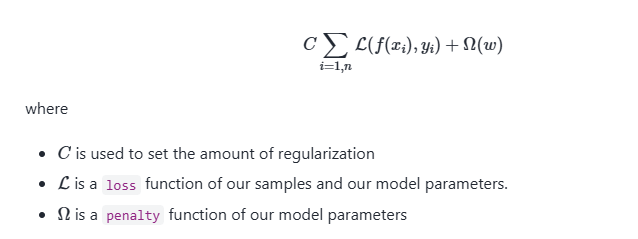 this is the image of the objective function. By adjusting the C value we control the trade-off between a wider margin and the amount of missclassification allowed.

PCA


In [15]:
# standardize the data first using the same vector on both training and testing data for consistency
mean_vector = np.mean(X_train, axis=0)
X_train_centered = X_train - mean_vector
X_test_centered = X_test - mean_vector

std_dev_vector = np.std(X_train, axis=0)
X_train_standardized = X_train_centered / std_dev_vector
X_test_standardized = X_test_centered / std_dev_vector
# create the coveriance matrix
coveriance_matrix = np.cov(X_train_standardized, rowvar=False)
# calculate the eigenvalues, eigenvectors of the coveriance matrix so that we can project the data onto. 
eigenvalues, eigenvectors = np.linalg.eig(coveriance_matrix)
# we should sort the eigenvalues and eigenvectors so that we can choose the most significant vectors to represent our database
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


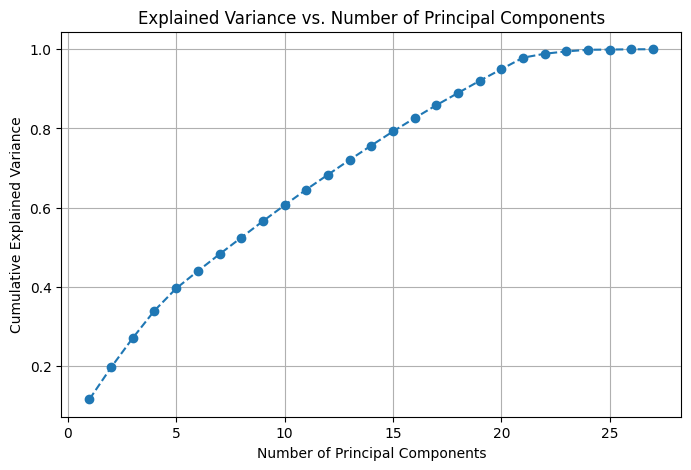

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate explained variance ratios
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()


In [17]:
first_sixteen_pcas = eigenvectors[:, :16]
# project the data onto these pca matrices
X_train_sixteen_pca = X_train_standardized.dot(first_sixteen_pcas)  
X_test_sixteen_pca = X_test_standardized.dot(first_sixteen_pcas)

first_ten_pcas = eigenvectors[:, :10]
# project the data onto these pca matrices
X_train_ten_pca = X_train_standardized.dot(first_ten_pcas)  
X_test_ten_pca = X_test_standardized.dot(first_ten_pcas)

first_five_pcas = eigenvectors[:, :5]
# project the data onto these pca matrices
X_train_five_pca = X_train_standardized.dot(first_five_pcas)  
X_test_five_pca = X_test_standardized.dot(first_five_pcas)

In [18]:
knn = KNeighborsClassifier(n_neighbors=10)
# Train the KNN classifier
knn.fit(X_train_sixteen_pca, y_train)
# Make predictions on the test data
y_pred = knn.predict(X_test_sixteen_pca)

# Evaluate the model
print("Accuracy with 16 pcas:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

knn.fit(X_train_ten_pca, y_train)
# Make predictions on the test data
y_pred = knn.predict(X_test_ten_pca)

# Evaluate the model
print("Accuracy with 10 pcas:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

knn.fit(X_train_five_pca, y_train)
# Make predictions on the test data
y_pred = knn.predict(X_test_five_pca)

# Evaluate the model
print("Accuracy with 5 pcas:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy with 16 pcas: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       200
           1       0.85      0.91      0.87       200

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400


Confusion Matrix:
 [[167  33]
 [ 19 181]]
Accuracy with 10 pcas: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       200
           1       0.86      0.86      0.86       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400


Confusion Matrix:
 [[172  28]
 [ 28 172]]
Accuracy with 5 pcas: 0.8725

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87  

In [19]:
svm_model.fit(X_train_sixteen_pca, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test_sixteen_pca)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("Accuracy with 16 pca's:", accuracy_score(y_test, y_pred))

svm_model.fit(X_train_ten_pca, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test_ten_pca)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("Accuracy with 10 pca's:", accuracy_score(y_test, y_pred))

svm_model.fit(X_train_five_pca, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test_five_pca)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("Accuracy with 5 pca's:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[174  26]
 [  6 194]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       200
           1       0.88      0.97      0.92       200

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

Accuracy with 16 pca's: 0.92
Confusion Matrix:
 [[169  31]
 [  9 191]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       200
           1       0.86      0.95      0.91       200

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400

Accuracy with 10 pca's: 0.9
Confusion Matrix:
 [[172  28]
 [ 15 185]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86

Both KNN and SVM performed better. Their accuracy increased by 0.03 and 0.06 respectively and this is a huge improvement since they were already performing arguably high 83% and 86%, by applying the 16 pca's we got rid of most of the noise features in the dataset. 11 of them were redundant when we consider the variance in the dataset. However, if we project the data onto even lower dimensions like 10 or 5. We see that the accuracy drops as well. This is because as we can see from the explained variance graph with respect to pca's that we took the elbow point is around 16. By choosing 16 pcas we are able to explain 85% of the variance in the dataset. However if we choose just 5 pca's although it helps with the problem of overfitting, only 40% of the variance is explained by the pca's. That is why the accuracy in our classification dropped as we lower the dimension after 16 dimensions.